In [1]:
import scipy.io as sio
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
df= pd.read_csv('./Results/Runtime_SPECTRA_CC_ME.csv')
df.head()

,Algo,InconsModelSize,NoOfCoreRxns,Runtime,LPS
0,FC,5000,50,51.069377,3570
1,SPcc_SPc,5000,50,0.269437,8
2,SP,5000,50,0.334500,9
3,SW,5000,50,0.556394,7
4,FC,5000,150,52.411145,3574


In [3]:
df2 = pd.DataFrame(columns=['Algo', 'InconsModelSize', 'Runtime_mean', 'Runtime_std', 'LPs_mean', 'LPs_std'])
for ims in df.InconsModelSize.unique():
    for al in df.Algo.unique():
        subdf = df[(df.InconsModelSize == ims) & (df.Algo == al)]
        if len(subdf) > 0:
            row = {
                'Algo': al,
                'InconsModelSize': ims,
                'Runtime_mean': subdf.Runtime.mean(),
                'Runtime_std': subdf.Runtime.std(),
                'LPs_mean': subdf.LPS.mean(),
                'LPs_std': subdf.LPS.std()
            }
            df2 = pd.concat([df2, pd.DataFrame([row])], ignore_index=True)

df2.head()

/tmp/ipykernel_104246/3957889793.py:14: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df2 = pd.concat([df2, pd.DataFrame([row])], ignore_index=True)


,Algo,InconsModelSize,Runtime_mean,Runtime_std,LPs_mean,LPs_std
0,FC,5000,54.924815,0.886883,3580.76,5.936948
1,SPcc_SPc,5000,0.351467,0.035085,12.10,1.669046
2,SP,5000,0.341977,0.028845,8.64,0.776176
3,SW,5000,0.556320,0.021128,10.22,2.033294
4,FC,5500,58.596749,0.523296,3514.24,5.825910


In [4]:

def plot_bar_plot(df,variable, algos,ax):
    labels = list(df['InconsModelSize'].unique())
    algo_map = {'FC': 'FastCC+Fastcore', 'SP': 'SPECTRA_CC_ME','SW': 'SwiftCC+Swiftcore'}
    labels.sort()  # Ensure labels are sorted for consistent bar placement
    mean_values = [df[df['Algo'] == algo][variable+'_mean'].values for algo in algos]
    std_values = [df[df['Algo'] == algo][variable+'_std'].values for algo in algos]
    
    x = np.arange(len(labels))  # label locations
    width = 0.25  # width of the bars
    # setting only the x-axis grid
    ax.xaxis.grid(False)
    ax.yaxis.grid(True, linestyle='-', alpha=0.5) 
    ax.set_axisbelow(True)
    colors = {'FC':'#008080','SW': '#004080','SP': '#80c080'}  # teal, dark blue, light green
    # Bars with design-matching colors
    for k in range(len(algos)):
        ax.bar(x + k * width, mean_values[k], width, color=colors[algos[k]], label=algo_map[algos[k]])
        ax.errorbar(x + k * width, mean_values[k], yerr=std_values[k], fmt='none', capsize=0, color = 'black', elinewidth=2)

    # Set x-axis labels
    ax.set_xticks(x)
    ax.set_xticklabels(labels, fontsize=14*2, rotation=45, ha='right')
    
    ax.set_yscale('log')
    # Remove legend and grid lines
    ax.set_yticks(ax.get_yticks())
    ax.set_yticklabels(ax.get_yticklabels(), fontsize=14*2)
    # ax.legend()
    ax.legend(fontsize=12*2,loc='upper center', bbox_to_anchor=(0.5, -0.25),
          ncol=3, frameon=False)

    ylabel_dict = {'Runtime': 'Runtime in seconds', 'LPs': 'Number of LPs solved'}

    # Remove chart border (top/right)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)

    ax.set_xlabel('Number of reactions in the universal model', fontsize=16*2, fontweight='bold')
    ax.set_ylabel(ylabel_dict[variable], fontsize=16*2, fontweight='bold')


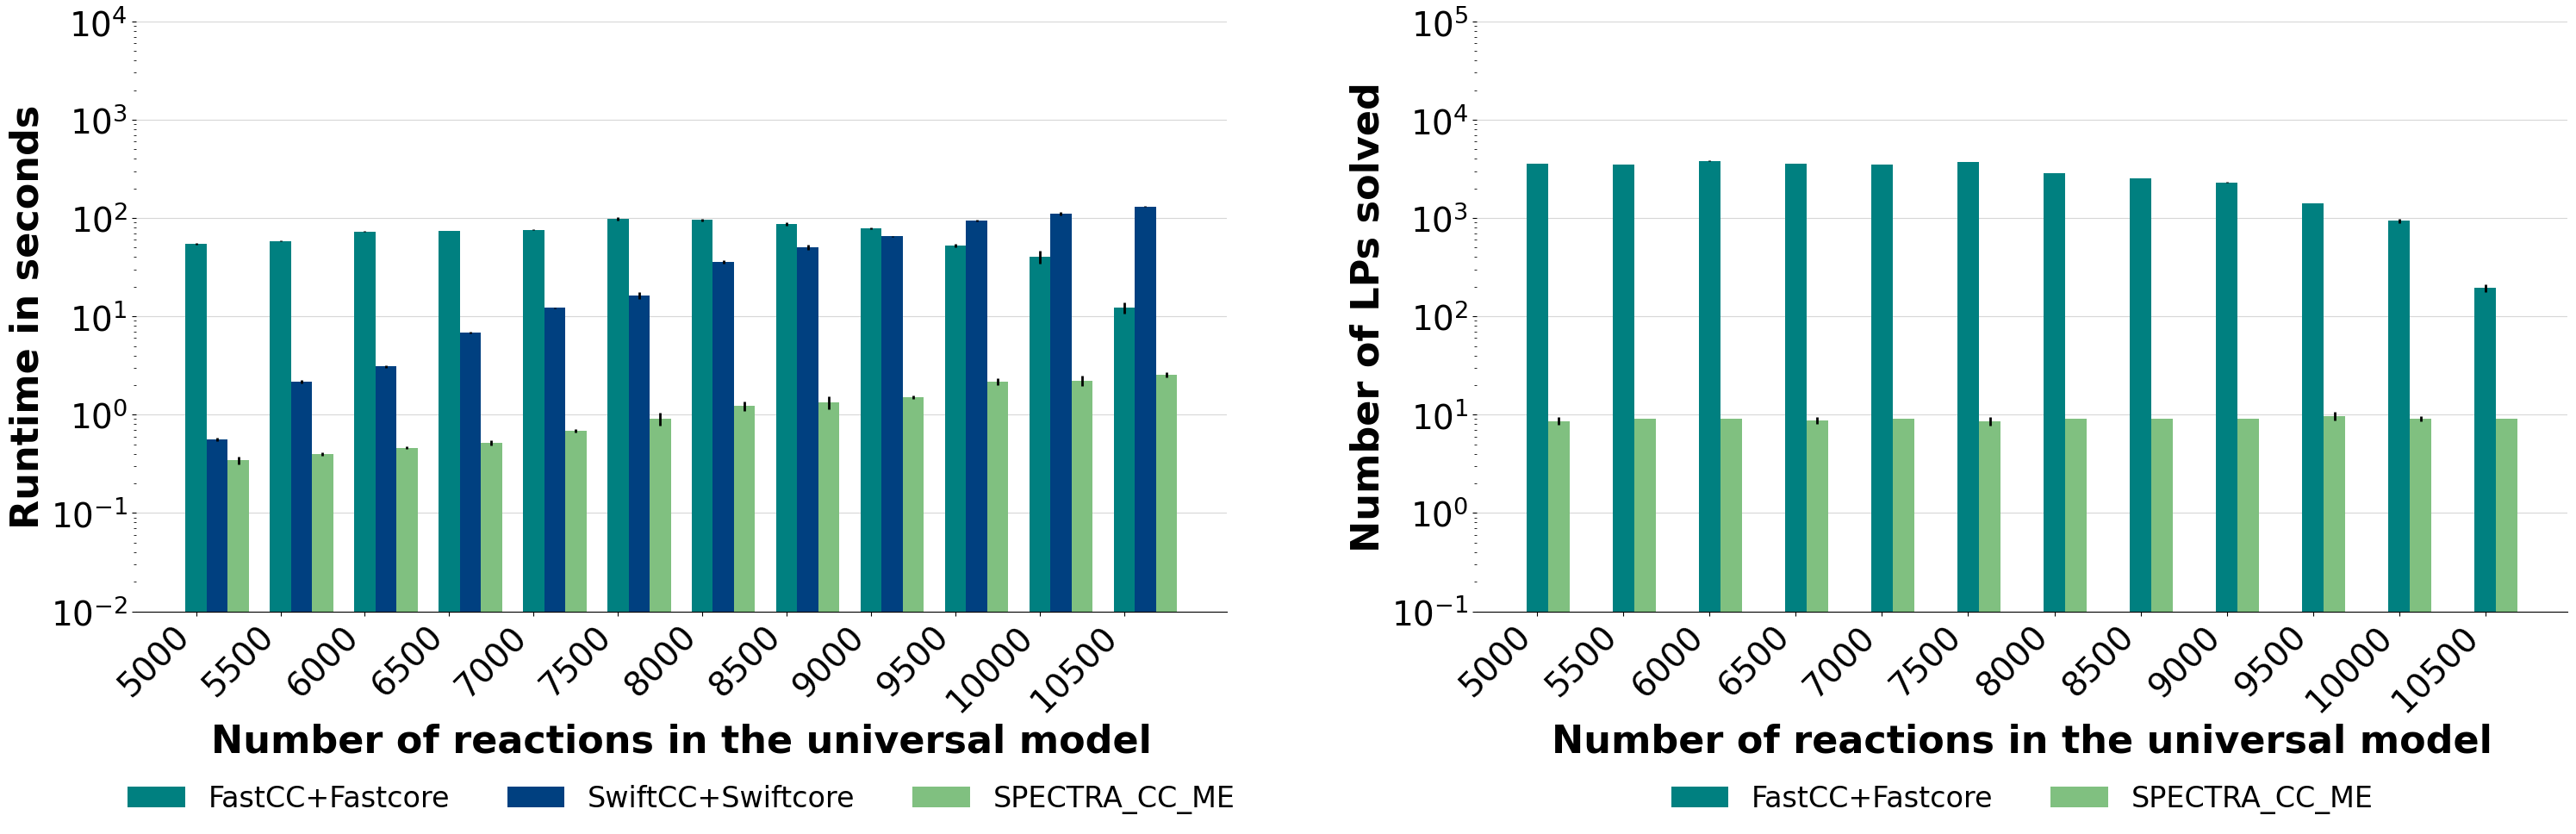

In [5]:
fig, ax = plt.subplots(1,2,figsize=(30, 10))
plot_bar_plot(df2,'Runtime', ['FC', 'SW', 'SP'],ax[0])
plot_bar_plot(df2,'LPs', ['FC', 'SP'],ax[1])
plt.tight_layout()
plt.savefig('./SPECTRA_CC_ME_runtime.png', bbox_inches='tight')
plt.show()
